In [25]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import sklearn.metrics as sm
from sklearn import metrics

In [3]:
dados = pd.read_csv("Dataset/Admission_Predict.csv")
dados.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
dados['GRE Score'] = (dados['GRE Score'] - dados['GRE Score'].min()) / (dados['GRE Score'].max() - dados['GRE Score'].min())
dados['TOEFL Score'] = (dados['TOEFL Score'] - dados['TOEFL Score'].min()) / (dados['TOEFL Score'].max() - dados['TOEFL Score'].min())
dados['University Rating'] = (dados['University Rating'] - dados['University Rating'].min()) / (dados['University Rating'].max() - dados['University Rating'].min())
dados['SOP'] = (dados['SOP'] - dados['SOP'].min()) / (dados['SOP'].max() - dados['SOP'].min())
dados['LOR '] = (dados['LOR '] - dados['LOR '].min()) / (dados['LOR '].max() - dados['LOR '].min())
dados['CGPA'] = (dados['CGPA'] - dados['CGPA'].min()) / (dados['CGPA'].max() - dados['CGPA'].min())
dados['Research'] = (dados['Research'] - dados['Research'].min()) / (dados['Research'].max() - dados['Research'].min())
dados['Chance of Admit '] = (dados['Chance of Admit '] - dados['Chance of Admit '].min()) / (dados['Chance of Admit '].max() - dados['Chance of Admit '].min())


In [27]:
media = dados['Chance of Admit '].mean()
dados[(dados[["Chance of Admit "]] >= media)] = 1
dados[(dados[["Chance of Admit "]] <= media)] = 0
dados.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,1.0
1,2,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,1.0
2,3,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.0
3,4,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,1.0
4,5,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.0


In [28]:
dados.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,1.0
1,2,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,1.0
2,3,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.0
3,4,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,1.0
4,5,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.0


In [29]:
X = dados.iloc[:, 1:7].values
X

array([[0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
        0.91346154],
       [0.68      , 0.53571429, 0.75      , 0.75      , 0.875     ,
        0.66346154],
       [0.52      , 0.42857143, 0.5       , 0.5       , 0.625     ,
        0.38461538],
       ...,
       [0.8       , 0.85714286, 0.75      , 1.        , 0.875     ,
        0.84935897],
       [0.44      , 0.39285714, 0.5       , 0.625     , 0.75      ,
        0.63461538],
       [0.86      , 0.89285714, 0.75      , 1.        , 0.75      ,
        0.91666667]])

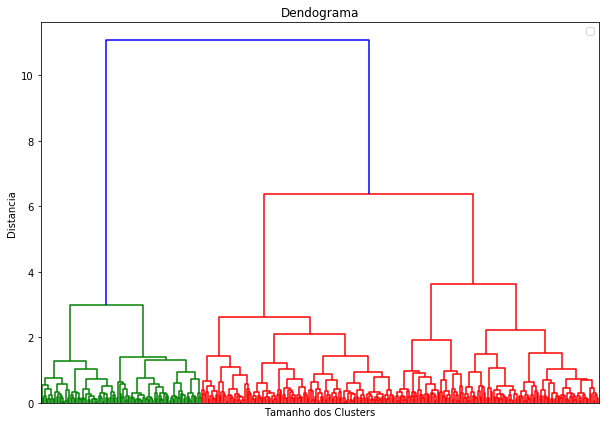

In [30]:

plt.figure(figsize=(10, 7))  
plt.title('Dendograma')  
plt.xlabel('Tamanho dos Clusters')
plt.ylabel('Distancia')
plt.legend('null')
plt.axhline(y=70)

plt.axhline(y=130)
dendograma = shc.dendrogram(shc.linkage(X, method='ward'), no_labels=True)

In [31]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)  


array([0, 0, 2, 2, 1, 0, 2, 1, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 0, 0, 0, 0, 1, 3, 3, 1, 2, 1, 1, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 3, 3, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 3, 1, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 1, 3, 3, 3, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 1, 3, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2,
       2, 2, 1, 1, 1, 3, 3, 3, 2, 2, 0, 0, 2, 1, 3, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1,
       2, 2, 1, 1, 0, 0, 2, 3, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 1, 1, 3, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 3, 3, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1,
       2, 1, 1, 2, 0, 0, 1, 3, 3, 3, 3, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 3, 3, 1, 1, 1, 2, 2, 2, 2, 1,

In [32]:
print(cluster.labels_)

[0 0 2 2 1 0 2 1 3 2 2 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 3 3 3 3 2 0 0 0 0 1
 3 3 1 2 1 1 0 0 0 0 0 2 2 2 1 2 2 2 2 1 3 3 1 1 2 1 1 2 2 2 1 2 0 0 0 0 0
 2 2 2 3 3 3 1 0 0 0 0 0 2 1 2 0 1 3 3 3 1 1 1 2 0 2 2 1 1 1 2 2 0 0 0 0 2
 0 2 1 2 0 2 1 3 0 0 0 1 2 2 1 2 1 2 0 0 0 2 0 0 0 2 1 2 2 2 2 0 0 2 1 1 2
 0 1 0 0 0 2 2 2 1 1 1 3 3 3 2 2 0 0 2 1 3 1 1 0 0 0 0 0 0 2 2 2 2 1 1 2 1
 0 2 0 0 0 0 0 0 0 2 1 1 1 2 2 1 1 0 0 2 3 1 2 1 2 0 0 0 0 0 0 0 0 2 2 2 2
 0 1 1 3 1 1 2 2 2 2 1 1 0 0 0 0 1 3 3 1 2 2 1 2 2 1 2 2 2 1 1 0 0 0 2 2 0
 0 0 2 1 1 2 1 1 2 0 0 1 3 3 3 3 2 0 1 1 1 2 2 2 2 0 0 0 0 0 2 1 3 3 1 1 1
 2 2 2 2 1 1 1 2 1 2 2 0 2 2 2 0 0 2 1 1 3 3 1 2 2 2 1 3 2 2 1 3 2 3 2 1 2
 2 0 0 2 0 0 0 2 2 2 1 3 3 3 3 3 1 2 0 1 2 3 1 2 1 1 1 2 0 0 1 2 2 2 3 3 3
 1 2 0 2 1 3 3 3 3 1 2 2 0 2 0 0 1 1 3 2 1 1 2 1 0 2 2 0 2 0]


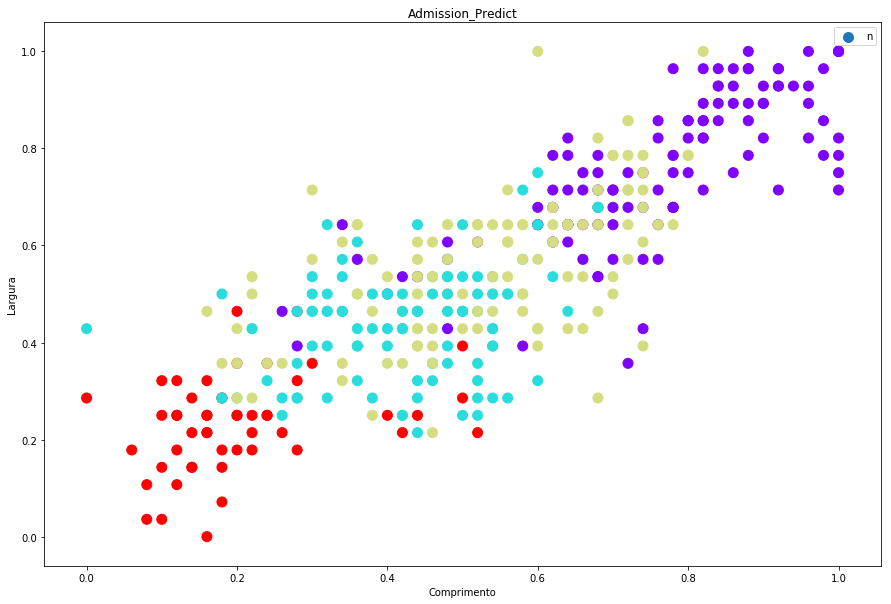

In [33]:
plt.figure(figsize=(15, 10))  
plt.scatter(X[:,0], X[:,1], c=cluster.labels_,s = 100, cmap='rainbow')  
plt.title('Admission_Predict')
plt.xlabel('Comprimento')
plt.ylabel('Largura')
plt.legend('null')
plt.show()

In [34]:
y = dados['Chance of Admit ']
y_pred  = cluster.fit_predict(X)
metrics.fowlkes_mallows_score(y,y_pred)

0.5314775123286993